## Machine Learning with Python
https://www.youtube.com/watch?v=OGxgnH8y2NM&list=PLQVvvaa0QuDfKTOs3Keq_kaG2P55YRn5v

In [1]:
from pathlib import Path
Path.cwd()

WindowsPath('C:/Users/balob/Documents/Practical_Machine_Learning')

In [22]:
import pandas as pd
import quandl, math, datetime
import numpy as np
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
import pickle

style.use('ggplot')

In [3]:
#df_source = quandl.get('WIKI/GOOGL')
#df.to_csv('google_quandl.csv')
df_source = pd.read_csv('./DATA/google_quandl.csv',index_col=0,parse_dates=True)
df_source.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0


Accuracy score: 0.98


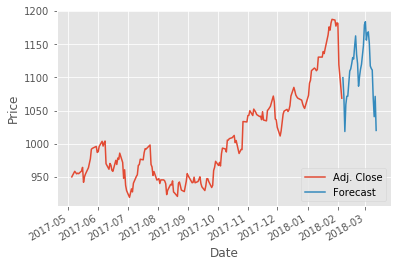

In [25]:
df = df_source[['Adj. Open','Adj. High','Adj. Low','Adj. Close','Adj. Volume']].copy()
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Close']) / df['Adj. Close'] * 100.0
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0

df = df[['Adj. Close','HL_PCT','PCT_change','Adj. Volume']]

forecast_col = 'Adj. Close'
df.fillna(-99999,inplace=True)

forecast_out = int(math.ceil(0.01*len(df)))

df['label'] = df[forecast_col].shift(-forecast_out)

X = np.array(df.drop(['label'],axis=1))
X = scale(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

df.dropna(inplace=True)

y = np.array(df['label'])

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

clf = LinearRegression()
clf.fit(X_train,y_train)

with open('./DATA/linearregression.pickle','wb') as f:
    pickle.dump(clf,f)
    
pickle_in = open('./DATA/linearregression.pickle','rb')
clf = pickle.load(pickle_in)

accuracy = clf.score(X_test,y_test)

print('Accuracy score: {:.2f}'.format(accuracy))

forecast_set = clf.predict(X_lately)
df['Forecast'] = np.nan

last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]

df['Adj. Close'].iloc[3200:].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [ ]:
import numpy as np
from sklearn import preprocessing, cross_validation, neighbors
import pandas as pd

df = pd.read_csv('breast-cancer-wisconsin.data.txt')
df.replace('?',-99999, inplace=True)
df.drop(['id'], 1, inplace=True)

X = np.array(df.drop(['class'], 1))
y = np.array(df['class'])

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)

clf = neighbors.KNeighborsClassifier()


clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)
print(confidence)

example_measures = np.array([[4,2,1,1,1,2,3,2,1]])
example_measures = example_measures.reshape(len(example_measures), -1)
prediction = clf.predict(example_measures)
print(prediction)

### Clustering Introduction - Practical Machine Learning Tutorial with Python p.34
https://www.youtube.com/watch?v=ZueoXMgCd1c&index=34&list=PLQVvvaa0QuDfKTOs3Keq_kaG2P55YRn5v <br>
https://pythonprogramming.net/machine-learning-clustering-introduction-machine-learning-tutorial/

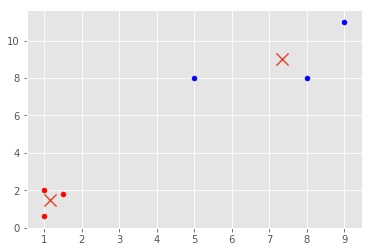

In [21]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
from sklearn.cluster import KMeans
style.use('ggplot')
X = np.array([[1, 2],
              [1.5, 1.8],
              [5, 8],
              [8, 8],
              [1, 0.6],
              [9, 11]])
clf = KMeans(n_clusters=2)
clf.fit(X)
centroids = clf.cluster_centers_
labels = clf.labels_
colors = ['b','r']
for i in range(len(X)):
    plt.scatter(X[i][0],X[i][1],c=colors[labels[i]],marker='.',s=100)
plt.scatter(centroids[:,0], centroids[:,1], marker = "x", s=150, linewidths = 5, zorder = 10)
plt.show()

### Handling Non-Numeric Data - Practical Machine Learning Tutorial with Python p.35
https://www.youtube.com/watch?v=8p6XaQSIFpY&index=35&list=PLQVvvaa0QuDfKTOs3Keq_kaG2P55YRn5v <br>
https://pythonprogramming.net/working-with-non-numerical-data-machine-learning-tutorial/?completed=/machine-learning-clustering-introduction-machine-learning-tutorial/

In [55]:
#https://pythonprogramming.net/static/downloads/machine-learning-data/titanic.xls
style.use('ggplot')
import numpy as np
import pandas as pd
df = pd.read_excel('./DATA/titanic.xls')
def handle_non_numerical_data(df):
    columns = df.columns.values # Get all column names into a numpy.ndarray
    for column in columns:
        text_digit_vals = {}
        # With this function we will convert each key in the dictionary into a number which is a value in the dictionary
        def convert_to_int(val):
            return text_digit_vals[val]
        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist() # Get the list of values in the column
            unique_elements = set(column_contents) # Get the unique elements in the column (DISTINCT)
            x = 0
            # With this cicle we create a dictionary of unique values
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1
            # Here we apply our dictionary to each element of the column with help of convert_to_int function
            df[column] = list(map(convert_to_int, df[column]))
    return df
df = handle_non_numerical_data(df)
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,731,0,29.0000,0,0,744,211.3375,74,1,2,NaN,168
1,1,1,304,1,0.9167,1,2,516,151.5500,182,1,16,NaN,368
2,1,0,266,0,2.0000,1,2,516,151.5500,182,1,0,NaN,368
3,1,0,448,1,30.0000,1,2,516,151.5500,182,1,0,135.0,368
4,1,0,517,0,25.0000,1,2,516,151.5500,182,1,0,NaN,368
